#<b>Image Captioning with Flickr 8K Dataset</b>

<b><u>Dataset Name</u>:</b> Flickr 8K Dataset<br>
<b><u>Dataset Link</u>:</b> https://www.kaggle.com/jainamshah17/flicker8k-image-captioning<br><br>

<b><u>Word Embedding Vector</u>:</b> Global Vector for Word Representation<br>
<b><u>Word Embedding Vector Link</u>:</b> https://www.kaggle.com/rtatman/glove-global-vectors-for-word-representation<br><br>

<b><u>Student Details</u>:</b>
<ol>
<li>Vignesh Baalaji S - 20MAI1002
<li>Sandhya S - 20MAI1012

##<b><i>Exploration of Environment

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

In [ ]:
!cat /proc/meminfo

MemTotal:       13305328 kB
MemFree:          157096 kB
MemAvailable:   10683892 kB
Buffers:          142936 kB
Cached:          9033408 kB
SwapCached:            0 kB
Active:          3731504 kB
Inactive:        8854628 kB
Active(anon):    1983236 kB
Inactive(anon):    47536 kB
Active(file):    1748268 kB
Inactive(file):  8807092 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               456 kB
Writeback:             0 kB
AnonPages:       3409836 kB
Mapped:          1572320 kB
Shmem:             48288 kB
KReclaimable:     297380 kB
Slab:             359716 kB
SReclaimable:     297380 kB
SUnreclaim:        62336 kB
KernelStack:        5428 kB
PageTables:        17424 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6652664 kB
Committed_AS:    6799548 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       51692 kB
VmallocChunk:          0 kB
Percpu:          

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-b3e9268e-18e9-21f9-23a4-7a2b3dab67d3)


In [ ]:
!nvidia-smi

Wed Jun  9 20:31:31 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P0    29W /  70W |   4074MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

##<b><i>Import Packages and Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2
import keras
import string
import numpy as np
import pickle as pk
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import SVG
from keras.applications import vgg16
from keras.models import Model, load_model
from keras.utils.vis_utils import model_to_dot
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.image import load_img, img_to_array
from keras.layers import Input, Dropout, Dense, LSTM, Embedding, Add
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from google.colab.patches import cv2_imshow

%matplotlib inline
plt.style.use('ggplot')

In [ ]:
proc_folder = '/content/drive/MyDrive/Datasets'
glove_folder = '/content/drive/MyDrive/Datasets/GloVe'
text_folder = '/content/drive/MyDrive/Datasets/Flickr8K_Original/Flickr8k_text'
img_folder = '/content/drive/MyDrive/Datasets/Flickr8K_Original/Flickr8k_Dataset/Flicker8k_Dataset'

In [ ]:
def load_text(filename):
    file = open(filename, 'r')
    text = file.read()
    text = text.split('\n')
    file.close()
    return text

train_imgs = load_text(os.path.join(text_folder, "Flickr_8k.trainImages.txt"))
test_imgs = load_text(os.path.join(text_folder, "Flickr_8k.testImages.txt"))
dev_imgs = load_text(os.path.join(text_folder, "Flickr_8k.devImages.txt"))

train_imgs = [x for x in train_imgs if x != '']
test_imgs = [x for x in test_imgs if x != '']
dev_imgs = [x for x in dev_imgs if x != '']

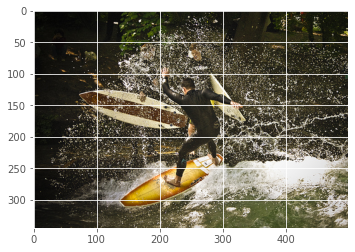

In [ ]:
image770 = train_imgs[770]
image_770 = load_img(os.path.join(img_folder, image770))
plt.imshow(image_770)

##<b><i>Image Preprocessing</i></b>

In [ ]:
def color_CLAHE(img):
  img = img[:, :, ::-1].copy()
  img = img.astype(dtype='uint8')
  lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
  lab_planes = cv2.split(lab)
  clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
  lab_planes[0] = clahe.apply(lab_planes[0])
  lab = cv2.merge(lab_planes)
  bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
  rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
  return rgb

In [ ]:
def get_inceptionv3_feature(img_folder, img_name, model):
    img = load_img(os.path.join(img_folder, img_name), target_size=(299,299))
    x = img_to_array(img)
    x = color_CLAHE(x)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    x = model.predict(x)
    x = np.reshape(x, x.shape[1])
    return x

model_inceptionv3 = InceptionV3(weights='imagenet')
model_inceptionv3 = Model(model_inceptionv3.input, model_inceptionv3.layers[-2].output)

incv3_features_img770 = get_inceptionv3_feature(img_folder, train_imgs[770], model_inceptionv3)
print("Shape of image vector for one image: {}".format(incv3_features_img770.shape))

Shape of image vector for one image: (2048,)


In [ ]:
encoded_train_images = {}
for i in range(0,len(train_imgs)):
  key = train_imgs[i].split('.')[0]
  print('I: '+str(i)+'/'+str(len(train_imgs))+' Key: '+key)
  encoded_train_images[key] = get_inceptionv3_feature(img_folder, train_imgs[i], model_inceptionv3)

Streaming output truncated to the last 5000 lines.
I: 1000/6000 Key: 3425127583_611200619a
I: 1001/6000 Key: 3487261028_30791528ec
I: 1002/6000 Key: 3136043366_b3f8607a0e
I: 1003/6000 Key: 3475005101_6f6e437459
I: 1004/6000 Key: 3472270112_0a7cb7b27c
I: 1005/6000 Key: 2868668723_0741222b23
I: 1006/6000 Key: 3500342526_393c739e2f
I: 1007/6000 Key: 542405691_0594b1ce72
I: 1008/6000 Key: 421153376_d1d325568f
I: 1009/6000 Key: 430964917_022995afb6
I: 1010/6000 Key: 1597319381_1e80d9e39c
I: 1011/6000 Key: 405331006_4e94e07698
I: 1012/6000 Key: 3493000349_81c540e828
I: 1013/6000 Key: 505955292_026f1489f2
I: 1014/6000 Key: 3122497129_d08f5729b8
I: 1015/6000 Key: 3428386573_670f5362f0
I: 1016/6000 Key: 2269961438_cae7a9c725
I: 1017/6000 Key: 3156113206_53c2a7b5d8
I: 1018/6000 Key: 3725177385_62d5e13634
I: 1019/6000 Key: 3590654365_fd4819f48b
I: 1020/6000 Key: 3178371973_60c6b8f110
I: 1021/6000 Key: 1402641725_5e027ecaa7
I: 1022/6000 Key: 1449625950_fc9a8d02d9
I: 1023/6000 Key: 2836808985_b26e4

##<b><i>Text Preprocessing with GloVe</i></b>

In [ ]:
def load_descriptions(doc):
    mapping = dict()
    for line in doc:
        tokens = line.split()
        if len(tokens) < 2:
            continue
        image_id, image_desc = tokens[0], tokens[1:]
        image_id = image_id.split('.')[0]
        image_desc = 'startseq '+' '.join(image_desc) + ' endseq'
        if image_id not in mapping.keys():
            mapping[image_id] = []
        mapping[image_id].append(image_desc)
    return mapping

def clean_description(desc_dict):
    table = str.maketrans('', '', string.punctuation)
    for key, desc_list in desc_dict.items():
        for i in range(len(desc_list)):
            desc = desc_list[i]
            desc = desc.split()
            desc = [word.lower() for word in desc]
            desc = [w.translate(table) for w in desc]
            desc = [word for word in desc if len(word)>1]
            desc_list[i] =  ' '.join(desc)

descriptions = load_text(os.path.join(text_folder, "Flickr8k.token.txt"))
desc_dict = load_descriptions(descriptions)
clean_description(desc_dict)

In [ ]:
vocabulary = set()
for key in desc_dict.keys():
    [vocabulary.update(d.split()) for d in desc_dict[key]]
vocabulary = list(vocabulary)
print('Original Vocabulary Size: %d' % len(vocabulary))

ixtoword = {}
wordtoix = {}
ix = 1
for w in vocabulary:
    wordtoix[w] = ix
    ixtoword[ix] = w
    ix += 1

embeddings_index = {}
f = open(os.path.join(glove_folder, 'glove.6B.200d.txt'), encoding="utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print("Volcabulary size of GLOVE: {}".format(len(embeddings_index)))

embedding_dim = 200
vocab_size = len(vocabulary)+1
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in wordtoix.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        
print("Shape of embedding weights for the current vocabulary {}".format(embedding_matrix.shape))

Original Vocabulary Size: 8810
Volcabulary size of GLOVE: 400000
Shape of embedding weights for the current vocabulary (8811, 200)


In [ ]:
def to_lines(descriptions):
    all_desc = list()
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
    return all_desc

def max_length(descriptions):
    lines = to_lines(descriptions)
    return max(len(d.split()) for d in lines)

def data_generator(descriptions, photos, wordtoix, max_length, num_photos_per_batch):
    X1, X2, y = list(), list(), list()
    n=0
    while True:
        for key, desc_list in descriptions.items():
            n+=1
            photo = photos[key]
            for desc in desc_list:
                seq = [wordtoix[word] for word in desc.split(' ') if word in wordtoix]
                for i in range(1, len(seq)):
                    in_seq, out_seq = seq[:i], seq[i]
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                    X1.append(photo)
                    X2.append(in_seq)
                    y.append(out_seq)
            if n == num_photos_per_batch:
                yield ([np.array(X1), np.array(X2)], np.array(y))
                X1, X2, y = list(), list(), list()
                n=0

In [ ]:
max_length = max_length(desc_dict)
print('Max Description Length: %d' % max_length)
num_photos_per_batch = 5
batch_generator = data_generator(descriptions=desc_dict, photos=encoded_train_images, wordtoix=wordtoix, max_length=max_length, num_photos_per_batch=num_photos_per_batch)
inputs, outputs = next(batch_generator)
print(inputs[0].shape)
print(inputs[1].shape)
print(outputs.shape)

Max Description Length: 34
(286, 2048)
(286, 34)
(286, 8811)


In [ ]:
def equalise_desc_and_images(desc_dict, encoded_train_images):

  eiKeys = encoded_train_images.keys()
  to_be_deleted = []

  for i in desc_dict.keys():
    if i not in eiKeys:
      to_be_deleted.append(i)

  for i in to_be_deleted:
    del desc_dict[i]

  ddKeys = desc_dict.keys()
  if len(eiKeys) == len(ddKeys):
    return True

##<b><i>Construction and Training of LSTM Model</i></b>

In [ ]:
inputs1 = Input(shape=(2048,))
fe1 = Dropout(0.5)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)

inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, embedding_dim, mask_zero=True)(inputs2)
se2 = Dropout(0.5)(se1)
se3 = LSTM(256)(se2)

decoder1 = Add()([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)

outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)

model.layers[2].set_weights([embedding_matrix])
model.layers[2].trainable = False

model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
num_epoch = 6
equalise_desc_and_images(desc_dict, encoded_train_images)

True

In [ ]:
for ep in range(1, num_epoch):
    print("Epoch {}".format(ep))
    model.fit_generator(generator=batch_generator, steps_per_epoch=len(encoded_train_images), epochs=1)
    model.save(os.path.join(proc_folder, 'inceptionv3_trained', "trained_model_{}epochs.h5".format(ep)))

Epoch 1


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


6000/6000 [==============================] - 633s 104ms/step - loss: 4.2757


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2
6000/6000 [==============================] - 623s 104ms/step - loss: 2.8465
Epoch 3
6000/6000 [==============================] - 618s 103ms/step - loss: 2.6000
Epoch 4
6000/6000 [==============================] - 618s 103ms/step - loss: 2.4828
Epoch 5
6000/6000 [==============================] - 611s 102ms/step - loss: 2.4072


In [ ]:
def caption_generator_incpt3glove(photo, model, max_length, wordtoix, ixtoword):

    in_text = ['startseq']
    for s in range(max_length):
        seq = [wordtoix[i] for i in in_text]
        seq = pad_sequences([seq], maxlen=max_length)[0]
        in_put = [np.array([photo]), np.array([seq])]
        out_word = model.predict(in_put, verbose=0)
        out_word = np.argmax(out_word)
        out_word = ixtoword[out_word]
        if out_word is None:
            break
        in_text.append(out_word)
        if out_word == 'endseq':
            break
    
    return in_text

In [ ]:
model.save('/content/drive/MyDrive/Datasets/Flickr_Model_FIVE_EpochsV2', save_format='h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


#<b>Model Evaluation</b>

In [ ]:
!pip install gTTS

In [ ]:
from gtts import gTTS
import IPython

##<b><i>Trail With Training Images</i></b>

GENERATED CAPTION: startseq man is climbing up snowy mountain endseq


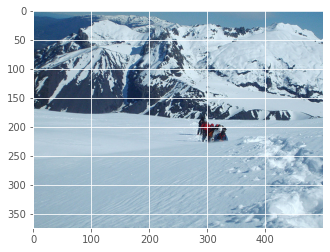

In [ ]:
image = train_imgs[30]
image = load_img(os.path.join(img_folder, image))
plt.imshow(image)
features = get_inceptionv3_feature(img_folder, train_imgs[30], model_inceptionv3)
caption = caption_generator_incpt3glove(features, model=model, max_length=34, wordtoix=wordtoix, ixtoword=ixtoword)
final_caption = ' '.join(caption)
print("GENERATED CAPTION: "+final_caption)
text2audio = gTTS(text=final_caption, lang='en', slow=False)
text2audio.save("audfile.mp3")
final_caption = ""
IPython.display.Audio("audfile.mp3", autoplay=True)

GENERATED CAPTION: startseq two men are standing on top of mountain endseq


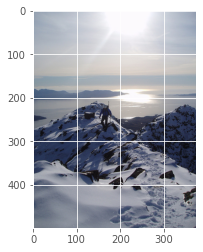

In [ ]:
image = train_imgs[50]
image = load_img(os.path.join(img_folder, image))
plt.imshow(image)
features = get_inceptionv3_feature(img_folder, train_imgs[50], model_inceptionv3)
caption = caption_generator_incpt3glove(features, model=model, max_length=34, wordtoix=wordtoix, ixtoword=ixtoword)
final_caption = ' '.join(caption)
print("GENERATED CAPTION: "+final_caption)
text2audio = gTTS(text=final_caption, lang='en', slow=False)
text2audio.save("audfile.mp3")
final_caption = ""
IPython.display.Audio("audfile.mp3", autoplay=True)

GENERATED CAPTION: startseq dog is jumping up to catch ball in the foggy yard endseq


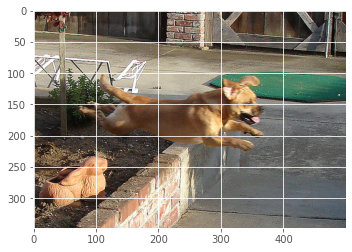

In [ ]:
image = train_imgs[777]
image = load_img(os.path.join(img_folder, image))
plt.imshow(image)
features = get_inceptionv3_feature(img_folder, train_imgs[777], model_inceptionv3)
caption = caption_generator_incpt3glove(features, model=model, max_length=34, wordtoix=wordtoix, ixtoword=ixtoword)
final_caption = ' '.join(caption)
print("GENERATED CAPTION: "+final_caption)
text2audio = gTTS(text=final_caption, lang='en', slow=False)
text2audio.save("audfile.mp3")
final_caption = ""
IPython.display.Audio("audfile.mp3", autoplay=True)

GENERATED CAPTION: startseq two dogs play in the snow endseq


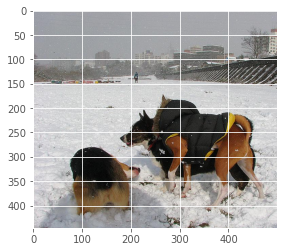

In [ ]:
image = train_imgs[3001]
image = load_img(os.path.join(img_folder, image))
plt.imshow(image)
features = get_inceptionv3_feature(img_folder, train_imgs[3001], model_inceptionv3)
caption = caption_generator_incpt3glove(features, model=model, max_length=34, wordtoix=wordtoix, ixtoword=ixtoword)
final_caption = ' '.join(caption)
print("GENERATED CAPTION: "+final_caption)
text2audio = gTTS(text=final_caption, lang='en', slow=False)
text2audio.save("audfile.mp3")
final_caption = ""
IPython.display.Audio("audfile.mp3", autoplay=True)

GENERATED CAPTION: startseq boy in pool endseq


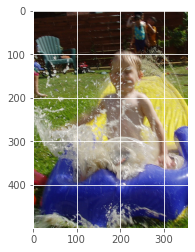

In [ ]:
image = train_imgs[2627]
image = load_img(os.path.join(img_folder, image))
plt.imshow(image)
features = get_inceptionv3_feature(img_folder, train_imgs[2627], model_inceptionv3)
caption = caption_generator_incpt3glove(features, model=model, max_length=34, wordtoix=wordtoix, ixtoword=ixtoword)
final_caption = ' '.join(caption)
print("GENERATED CAPTION: "+final_caption)
text2audio = gTTS(text=final_caption, lang='en', slow=False)
text2audio.save("audfile.mp3")
final_caption = ""
IPython.display.Audio("audfile.mp3", autoplay=True)

GENERATED CAPTION: startseq two dogs play together on the grass endseq


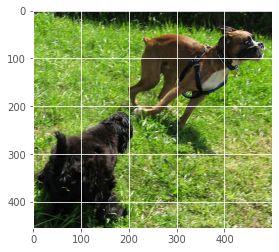

In [ ]:
image = train_imgs[2620]
image = load_img(os.path.join(img_folder, image))
plt.imshow(image)
features = get_inceptionv3_feature(img_folder, train_imgs[2620], model_inceptionv3)
caption = caption_generator_incpt3glove(features, model=model, max_length=34, wordtoix=wordtoix, ixtoword=ixtoword)
final_caption = ' '.join(caption)
print("GENERATED CAPTION: "+final_caption)
text2audio = gTTS(text=final_caption, lang='en', slow=False)
text2audio.save("audfile.mp3")
final_caption = ""
IPython.display.Audio("audfile.mp3", autoplay=True)

GENERATED CAPTION: startseq boy in swimming trunks is jumping into pool endseq


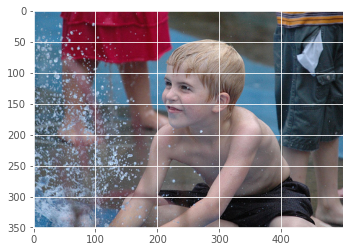

In [ ]:
image = train_imgs[3721]
image = load_img(os.path.join(img_folder, image))
plt.imshow(image)
features = get_inceptionv3_feature(img_folder, train_imgs[3721], model_inceptionv3)
caption = caption_generator_incpt3glove(features, model=model, max_length=34, wordtoix=wordtoix, ixtoword=ixtoword)
final_caption = ' '.join(caption)
print("GENERATED CAPTION: "+final_caption)
text2audio = gTTS(text=final_caption, lang='en', slow=False)
text2audio.save("audfile.mp3")
final_caption = ""
IPython.display.Audio("audfile.mp3", autoplay=True)

GENERATED CAPTION: startseq dog runs through the snow endseq


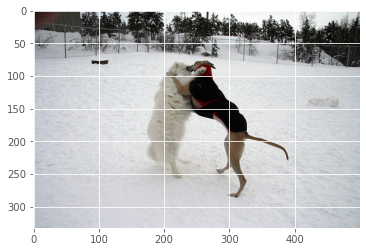

In [ ]:
image = train_imgs[1110]
image = load_img(os.path.join(img_folder, image))
plt.imshow(image)
features = get_inceptionv3_feature(img_folder, train_imgs[1110], model_inceptionv3)
caption = caption_generator_incpt3glove(features, model=model, max_length=34, wordtoix=wordtoix, ixtoword=ixtoword)
final_caption = ' '.join(caption)
print("GENERATED CAPTION: "+final_caption)
text2audio = gTTS(text=final_caption, lang='en', slow=False)
text2audio.save("audfile.mp3")
final_caption = ""
IPython.display.Audio("audfile.mp3", autoplay=True)

GENERATED CAPTION: startseq young boy in red and white uniform is playing baseball endseq


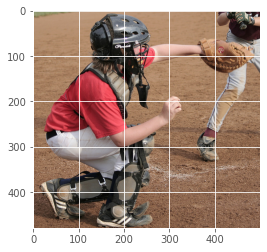

In [ ]:
image = train_imgs[666]
image = load_img(os.path.join(img_folder, image))
plt.imshow(image)
features = get_inceptionv3_feature(img_folder, train_imgs[666], model_inceptionv3)
caption = caption_generator_incpt3glove(features, model=model, max_length=34, wordtoix=wordtoix, ixtoword=ixtoword)
final_caption = ' '.join(caption)
print("GENERATED CAPTION: "+final_caption)
text2audio = gTTS(text=final_caption, lang='en', slow=False)
text2audio.save("audfile.mp3")
final_caption = ""
IPython.display.Audio("audfile.mp3", autoplay=True)

##<b><i>Validation with Dev Set Images (Validation Set)

GENERATED CAPTION: startseq man in wetsuit is waterskiing on the beach endseq


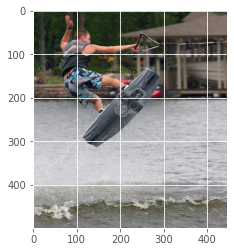

In [ ]:
image = dev_imgs[888]
image = load_img(os.path.join(img_folder, image))
plt.imshow(image)
features = get_inceptionv3_feature(img_folder, dev_imgs[888], model_inceptionv3)
caption = caption_generator_incpt3glove(features, model=model, max_length=34, wordtoix=wordtoix, ixtoword=ixtoword)
final_caption = ' '.join(caption)
print("GENERATED CAPTION: "+final_caption)
text2audio = gTTS(text=final_caption, lang='en', slow=False)
text2audio.save("audfile.mp3")
final_caption = ""
IPython.display.Audio("audfile.mp3", autoplay=True)

GENERATED CAPTION: startseq black dog is running through the grass endseq


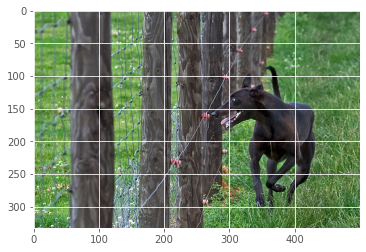

In [ ]:
image = dev_imgs[20]
image = load_img(os.path.join(img_folder, image))
plt.imshow(image)
features = get_inceptionv3_feature(img_folder, dev_imgs[20], model_inceptionv3)
caption = caption_generator_incpt3glove(features, model=model, max_length=34, wordtoix=wordtoix, ixtoword=ixtoword)
final_caption = ' '.join(caption)
print("GENERATED CAPTION: "+final_caption)
text2audio = gTTS(text=final_caption, lang='en', slow=False)
text2audio.save("audfile.mp3")
final_caption = ""
IPython.display.Audio("audfile.mp3", autoplay=True)

GENERATED CAPTION: startseq man in aerodynamic gear is riding bike on the side of mountain endseq


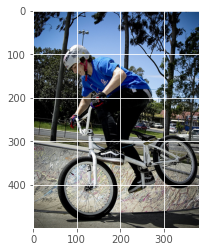

In [ ]:
image = dev_imgs[70]
image = load_img(os.path.join(img_folder, image))
plt.imshow(image)
features = get_inceptionv3_feature(img_folder, dev_imgs[70], model_inceptionv3)
caption = caption_generator_incpt3glove(features, model=model, max_length=34, wordtoix=wordtoix, ixtoword=ixtoword)
final_caption = ' '.join(caption)
print("GENERATED CAPTION: "+final_caption)
text2audio = gTTS(text=final_caption, lang='en', slow=False)
text2audio.save("audfile.mp3")
final_caption = ""
IPython.display.Audio("audfile.mp3", autoplay=True)

##<b><i>Validation With Test Set Images</i></b>

GENERATED CAPTION: startseq two dogs are bearing their teeth in the air endseq


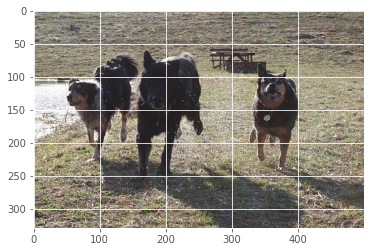

In [ ]:
image = test_imgs[100]
image = load_img(os.path.join(img_folder, image))
plt.imshow(image)
features = get_inceptionv3_feature(img_folder, test_imgs[100], model_inceptionv3)
caption = caption_generator_incpt3glove(features, model=model, max_length=34, wordtoix=wordtoix, ixtoword=ixtoword)
final_caption = ' '.join(caption)
print("GENERATED CAPTION: "+final_caption)
text2audio = gTTS(text=final_caption, lang='en', slow=False)
text2audio.save("audfile.mp3")
final_caption = ""
IPython.display.Audio("audfile.mp3", autoplay=True)

GENERATED CAPTION: startseq the american footballer in red keeps the ball endseq


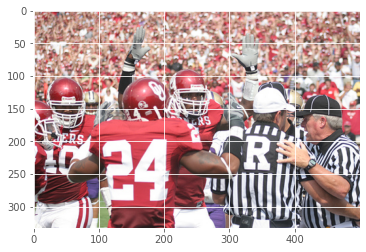

In [ ]:
image = test_imgs[30]
image = load_img(os.path.join(img_folder, image))
plt.imshow(image)
features = get_inceptionv3_feature(img_folder, test_imgs[30], model_inceptionv3)
caption = caption_generator_incpt3glove(features, model=model, max_length=34, wordtoix=wordtoix, ixtoword=ixtoword)
final_caption = ' '.join(caption)
print("GENERATED CAPTION: "+final_caption)
text2audio = gTTS(text=final_caption, lang='en', slow=False)
text2audio.save("audfile.mp3")
final_caption = ""
IPython.display.Audio("audfile.mp3", autoplay=True)

GENERATED CAPTION: startseq man in red helmet riding bike endseq


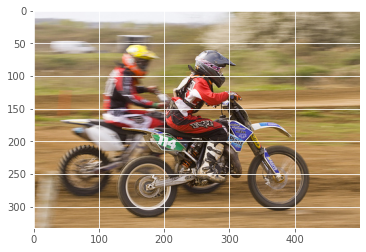

In [ ]:
image = test_imgs[210]
image = load_img(os.path.join(img_folder, image))
plt.imshow(image)
features = get_inceptionv3_feature(img_folder, test_imgs[210], model_inceptionv3)
caption = caption_generator_incpt3glove(features, model=model, max_length=34, wordtoix=wordtoix, ixtoword=ixtoword)
final_caption = ' '.join(caption)
print("GENERATED CAPTION: "+final_caption)
text2audio = gTTS(text=final_caption, lang='en', slow=False)
text2audio.save("audfile.mp3")
final_caption = ""
IPython.display.Audio("audfile.mp3", autoplay=True)

GENERATED CAPTION: startseq dog catches frisbee in the grass endseq


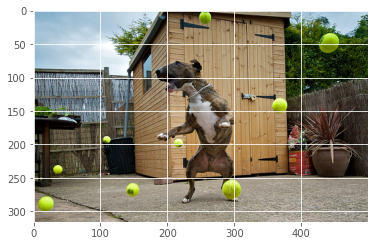

In [ ]:
image = test_imgs[999]
image = load_img(os.path.join(img_folder, image))
plt.imshow(image)
features = get_inceptionv3_feature(img_folder, test_imgs[999], model_inceptionv3)
caption = caption_generator_incpt3glove(features, model=model, max_length=34, wordtoix=wordtoix, ixtoword=ixtoword)
final_caption = ' '.join(caption)
print("GENERATED CAPTION: "+final_caption)
text2audio = gTTS(text=final_caption, lang='en', slow=False)
text2audio.save("audfile.mp3")
final_caption = ""
IPython.display.Audio("audfile.mp3", autoplay=True)

GENERATED CAPTION: startseq man is sitting on top of large rock overlooking the ocean endseq


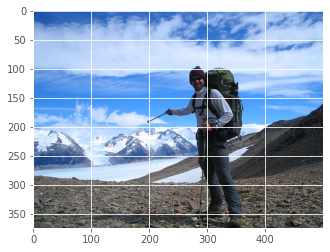

In [ ]:
image = test_imgs[199]
image = load_img(os.path.join(img_folder, image))
plt.imshow(image)
features = get_inceptionv3_feature(img_folder, test_imgs[199], model_inceptionv3)
caption = caption_generator_incpt3glove(features, model=model, max_length=34, wordtoix=wordtoix, ixtoword=ixtoword)
final_caption = ' '.join(caption)
print("GENERATED CAPTION: "+final_caption)
text2audio = gTTS(text=final_caption, lang='en', slow=False)
text2audio.save("audfile.mp3")
final_caption = ""
IPython.display.Audio("audfile.mp3", autoplay=True)

GENERATED CAPTION: startseq boy in red shirt is swinging on swing set endseq


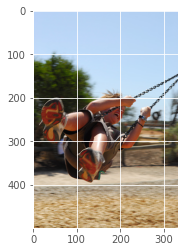

In [ ]:
image = test_imgs[333]
image = load_img(os.path.join(img_folder, image))
plt.imshow(image)
features = get_inceptionv3_feature(img_folder, test_imgs[333], model_inceptionv3)
caption = caption_generator_incpt3glove(features, model=model, max_length=34, wordtoix=wordtoix, ixtoword=ixtoword)
final_caption = ' '.join(caption)
print("GENERATED CAPTION: "+final_caption)
text2audio = gTTS(text=final_caption, lang='en', slow=False)
text2audio.save("audfile.mp3")
final_caption = ""
IPython.display.Audio("audfile.mp3", autoplay=True)

GENERATED CAPTION: startseq beagle is walking along the beach endseq


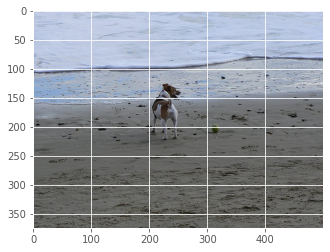

In [ ]:
image = test_imgs[477]
image = load_img(os.path.join(img_folder, image))
plt.imshow(image)
features = get_inceptionv3_feature(img_folder, test_imgs[477], model_inceptionv3)
caption = caption_generator_incpt3glove(features, model=model, max_length=34, wordtoix=wordtoix, ixtoword=ixtoword)
final_caption = ' '.join(caption)
print("GENERATED CAPTION: "+final_caption)
text2audio = gTTS(text=final_caption, lang='en', slow=False)
text2audio.save("audfile.mp3")
final_caption = ""
IPython.display.Audio("audfile.mp3", autoplay=True)

GENERATED CAPTION: startseq man in black shirt and backpack is paddling boat endseq


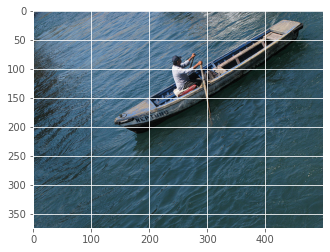

In [ ]:
image = test_imgs[789]
image = load_img(os.path.join(img_folder, image))
plt.imshow(image)
features = get_inceptionv3_feature(img_folder, test_imgs[789], model_inceptionv3)
caption = caption_generator_incpt3glove(features, model=model, max_length=34, wordtoix=wordtoix, ixtoword=ixtoword)
final_caption = ' '.join(caption)
print("GENERATED CAPTION: "+final_caption)
text2audio = gTTS(text=final_caption, lang='en', slow=False)
text2audio.save("audfile.mp3")
final_caption = ""
IPython.display.Audio("audfile.mp3", autoplay=True)

GENERATED CAPTION: startseq man in black shirt and jeans is standing on the grass endseq


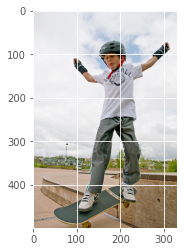

In [ ]:
image = test_imgs[899]
image = load_img(os.path.join(img_folder, image))
plt.imshow(image)
features = get_inceptionv3_feature(img_folder, test_imgs[899], model_inceptionv3)
caption = caption_generator_incpt3glove(features, model=model, max_length=34, wordtoix=wordtoix, ixtoword=ixtoword)
final_caption = ' '.join(caption)
print("GENERATED CAPTION: "+final_caption)
text2audio = gTTS(text=final_caption, lang='en', slow=False)
text2audio.save("audfile.mp3")
final_caption = ""
IPython.display.Audio("audfile.mp3", autoplay=True)

GENERATED CAPTION: startseq man in red shirt riding bike down dirt road endseq


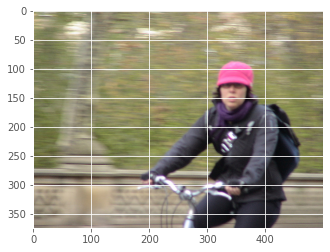

In [ ]:
image = test_imgs[888]
image = load_img(os.path.join(img_folder, image))
plt.imshow(image)
features = get_inceptionv3_feature(img_folder, test_imgs[888], model_inceptionv3)
caption = caption_generator_incpt3glove(features, model=model, max_length=34, wordtoix=wordtoix, ixtoword=ixtoword)
final_caption = ' '.join(caption)
print("GENERATED CAPTION: "+final_caption)
text2audio = gTTS(text=final_caption, lang='en', slow=False)
text2audio.save("audfile.mp3")
final_caption = ""
IPython.display.Audio("audfile.mp3", autoplay=True)

GENERATED CAPTION: startseq man in wetsuit is surfing on the water endseq


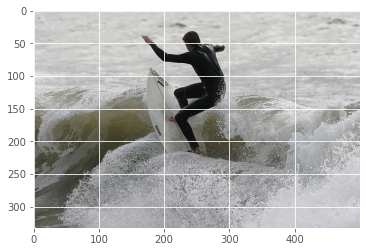

In [ ]:
image = test_imgs[667]
image = load_img(os.path.join(img_folder, image))
plt.imshow(image)
features = get_inceptionv3_feature(img_folder, test_imgs[667], model_inceptionv3)
caption = caption_generator_incpt3glove(features, model=model, max_length=34, wordtoix=wordtoix, ixtoword=ixtoword)
final_caption = ' '.join(caption)
print("GENERATED CAPTION: "+final_caption)
text2audio = gTTS(text=final_caption, lang='en', slow=False)
text2audio.save("audfile.mp3")
final_caption = ""
IPython.display.Audio("audfile.mp3", autoplay=True)

GENERATED CAPTION: startseq dog is jumping over fence endseq


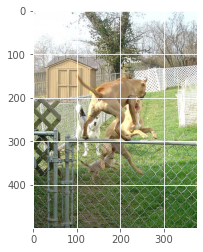

In [ ]:
image = test_imgs[666]
image = load_img(os.path.join(img_folder, image))
plt.imshow(image)
features = get_inceptionv3_feature(img_folder, test_imgs[666], model_inceptionv3)
caption = caption_generator_incpt3glove(features, model=model, max_length=34, wordtoix=wordtoix, ixtoword=ixtoword)
final_caption = ' '.join(caption)
print("GENERATED CAPTION: "+final_caption)
text2audio = gTTS(text=final_caption, lang='en', slow=False)
text2audio.save("audfile.mp3")
final_caption = ""
IPython.display.Audio("audfile.mp3", autoplay=True)